In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from dtw import dtw
from numpy.linalg import norm

In [4]:

files = []

for NNN in [3, 5, 6, 10]:
    folder = 'clusters/' + str(NNN)
    files  += [folder + '/' + fff for fff in os.listdir(folder) if '.dat' in fff]

In [5]:
curves = []

xs = set()
ys = set()

for fn in files:
    
    with open(fn) as myfile:
        x, y = myfile.read().strip().split('\n')
        #x = [float(xx) for xx in x.split('\t')]
        #y = 
        #curves.append(y)
        xs.add(x)
        ys.add(y)

print len(xs)
print len(ys)

x      = [float(xx) for xx in x.split('\t')]
curves = [[float(yy) for yy in y.split('\t')] for y in list(ys)]

1
35


In [6]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

'for i in range(n):\n    for j in range(n):    \n        ax[i,j].set_axis_off()\n\n\nfor i in range(n):\n    for j in range(n):\n        ax[i,j].get_xaxis().set_visible(False)\n        ax[i,j].get_yaxis().set_visible(False)    \n\n'

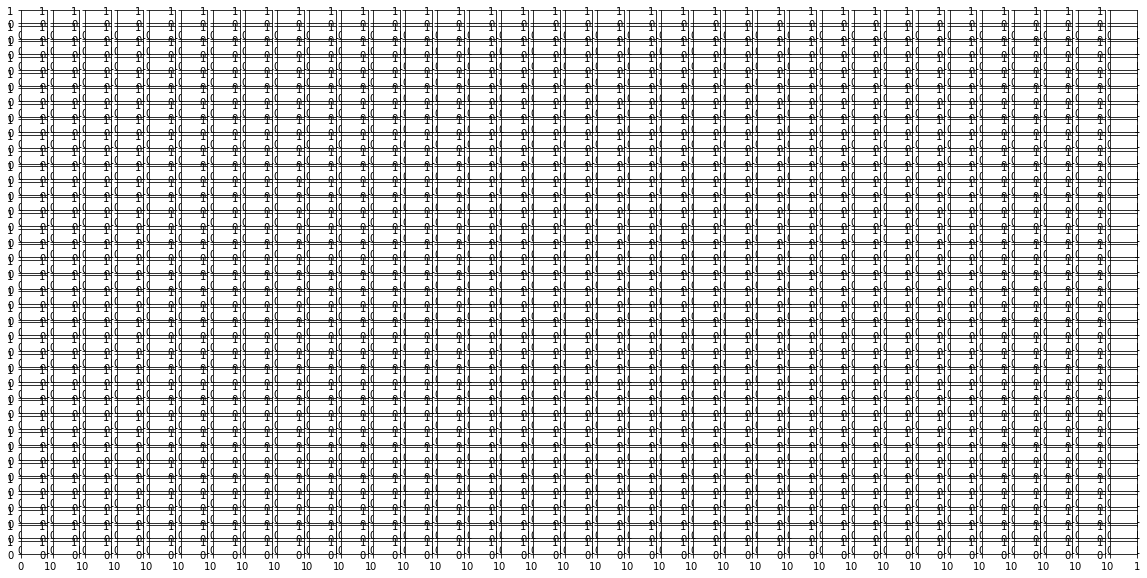

In [83]:
import random
n = len(curves)
distances = np.zeros((n,n))

f, ax = plt.subplots(n, n, figsize=(20, 10))

#random.shuffle(curves)

for i, x in enumerate(curves[0:n]):
    for j, y in enumerate(curves[0:n]):

        if i != j:
            xx = np.asarray(x).reshape(-1, 1)
            yy = np.asarray(y).reshape(-1, 1)

            dist, cost, acc, path = dtw(xx, yy, dist=lambda xx, yy: norm(xx - yy, ord=1))
            map_x, map_y = path
            
 
            distances[i,j] = spearmanr(xx[map_x],yy[map_y])[0]
            
            
            
            '''ax[i,j].plot(xx[map_x], 'r')
            ax[i,j].plot(yy[map_y], 'b')
            ax[i,j].set_title('corr = ' + str(round(spearmanr(xx[map_x],yy[map_y])[0], 4)) )
    
            ax[i,j].spines['bottom'].set_color('lightgrey')
            ax[i,j].spines['top'].set_color('lightgrey')
            ax[i,j].spines['left'].set_color('lightgrey')
            ax[i,j].spines['right'].set_color('lightgrey')
            '''
    

'''for i in range(n):
    for j in range(n):    
        ax[i,j].set_axis_off()


for i in range(n):
    for j in range(n):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)    

'''

In [10]:
from sklearn.cluster import KMeans

In [71]:
x = []
y = []
for n in range(2,15):

    kmeans = KMeans(n_clusters=n, random_state=0).fit(distances)
    
    
    x.append(n)
    y.append(kmeans.score(distances))

In [73]:
len(distances)

35

Text(0,0.5,'ds/dn (derivative)')

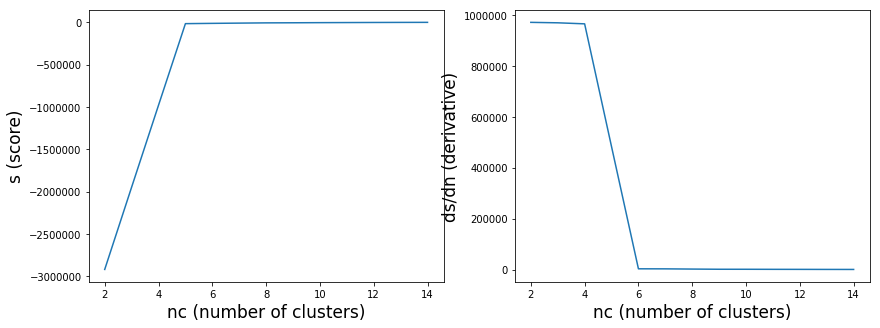

In [72]:
f, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(x, y)
#ax[0].set_xlim([0,10])
ax[1].plot(x, np.gradient(y))
ax[0].set_xlabel('nc (number of clusters)', fontsize = 17)
ax[0].set_ylabel('s (score)', fontsize = 17)
ax[1].set_xlabel('nc (number of clusters)', fontsize = 17)
ax[1].set_ylabel('ds/dn (derivative)', fontsize = 17)


In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as hac

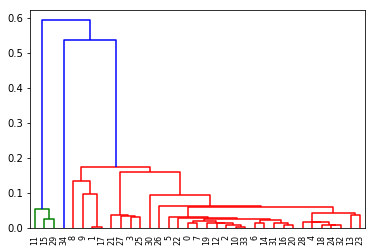

In [79]:
from collections import Counter
kmeans = KMeans(n_clusters=2, random_state=0).fit(distances)
labels = list(kmeans.labels_)
Counter(labels)

Counter({0: 34, 1: 1})

In [16]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]


print labels
ClusterIndicesNumpy(0, kmeans.labels_)

[1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 3, 0, 1, 3, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1]


array([ 6, 10, 11, 12, 14, 15, 18, 22, 28, 30, 32])

IndexError: index 3 is out of bounds for axis 0 with size 3

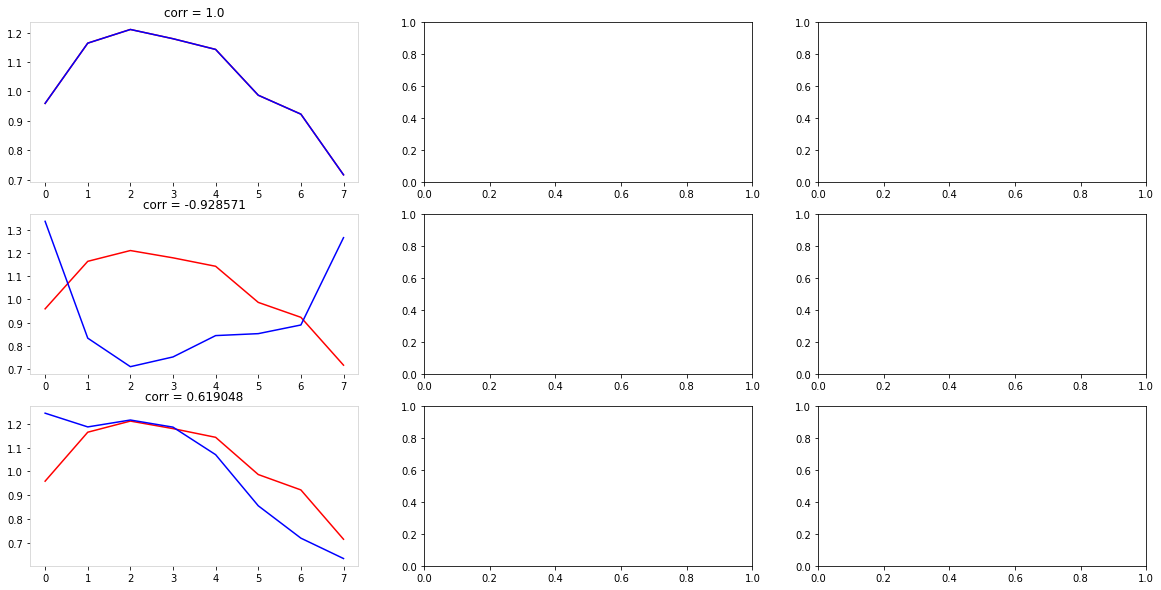

In [18]:
import random
n = 3#len(curves)

f, ax = plt.subplots(n, n, figsize=(20, 10))

random.shuffle(curves)
i = 0
j = 0
for ind1, curve1 in enumerate(curves):
    for ind2, curve2 in enumerate(curves):

            if labels[ind1] == 3 and labels[ind2] == 3:
                  
                ax[i,j].plot(curve1, 'r')
                ax[i,j].plot(curve2, 'b')
                ax[i,j].set_title('corr = ' + str(round(spearmanr(curve1,curve2)[0], 6)) )

                ax[i,j].spines['bottom'].set_color('lightgrey')
                ax[i,j].spines['top'].set_color('lightgrey')
                ax[i,j].spines['left'].set_color('lightgrey')
                ax[i,j].spines['right'].set_color('lightgrey')

                i += 1
                if i == 4:
                    j += 1
                    i = 0


for i in range(n):
    for j in range(n):    
        ax[i,j].set_axis_off()


for i in range(n):
    for j in range(n):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)    


In [28]:
def organizemtx(indicies, C, nc):
    
    
    f, ax = plt.subplots(1, 2, figsize=(14, 5))

    
    # This generates 100 variables that could possibly be assigned to 5 clusters
    n_variables = len(C[0])
    n_clusters = nc
    n_samples = 1000
    #indicies  = np.asarray(indicies).reshape(-1,1)

    bindicies = indicies


    cluster_size = n_variables / n_clusters
    belongs_to_cluster = np.repeat(range(n_clusters), cluster_size)
    np.random.shuffle(belongs_to_cluster)

    latent = np.random.randn(n_clusters, n_samples)

    def score(C):
        score = 0
        for cluster in range(n_clusters):
            inside_cluster = np.arange(cluster_size) + cluster * cluster_size
            outside_cluster = np.setdiff1d(range(n_variables), inside_cluster)
            score += np.sum(C[inside_cluster, :][:, inside_cluster])
            score -= np.sum(C[inside_cluster, :][:, outside_cluster])
            score -= np.sum(C[outside_cluster, :][:, inside_cluster])

        return score


    initial_C = C
    initial_score = score(C)
    initial_ordering = np.arange(n_variables)

    ax[0].imshow(C, interpolation='nearest')
    #plt.title('Initial C')
   
    def swap_rows(C, var1, var2):
        '''
        Function to swap two rows in a covariance matrix,
        updating the appropriate columns as well.
        '''
        D = C.copy()
        D[var2, :] = C[var1, :]
        D[var1, :] = C[var2, :]

        E = D.copy()
        E[:, var2] = D[:, var1]
        E[:, var1] = D[:, var2]

        return E



    current_C = C
    current_ordering = initial_ordering
    current_score = initial_score

    max_iter = 1000
    for i in range(max_iter):
        # Find the best row swap to make
        best_C = current_C
        best_ordering = current_ordering
        best_score = current_score
        for row1 in range(n_variables):
            for row2 in range(n_variables):
                if row1 == row2:
                    continue
                option_ordering = best_ordering.copy()
                option_ordering[row1] = best_ordering[row2]
                option_ordering[row2] = best_ordering[row1]
                option_C   = swap_rows(best_C, row1, row2)


                option_score = score(option_C)

                if option_score > best_score:
                    best_C = option_C
                    best_ordering = option_ordering
                    best_score = option_score
    
                    temp = bindicies[row1]
                    bindicies[row1] = bindicies[row2]
                    bindicies[row2] = temp



        if best_score > current_score:
            # Perform the best row swap
            current_C = best_C
            current_ordering = best_ordering
            current_score = best_score
        else:
            # No row swap found that improves the solution, we're done
            break

    # Output the result
    ax[1].set_title('bestscore = ' + str(round(best_score, 2)), fontsize = 17)
    ccax  = ax[1].imshow(current_C, interpolation='nearest')
    cbar = f.colorbar(ccax, ticks=[-1, 0, 1], )
    plt.show()


    return best_score, bindicies, current_C


In [23]:
x = []
y = []
for n in range(2,15):
    best_score, bindicies, distances_org = organizemtx(range(len(curves)), distances, n)
    x.append(n)
    y.append(best_score)

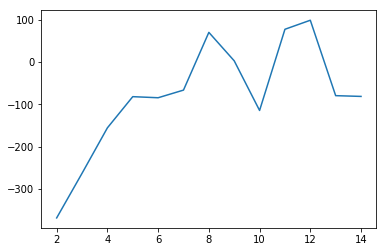

In [39]:
plt.plot(x,np.gradient(y))

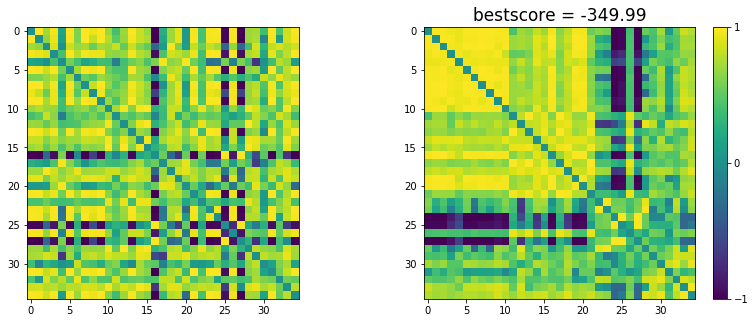

In [30]:
b,bindicies, distances_org = organizemtx(range(len(curves)), distances, 3)

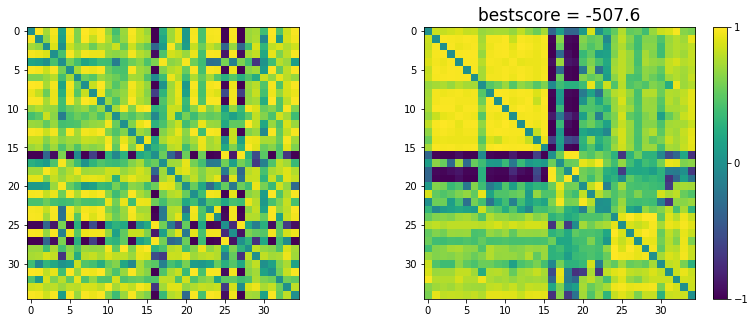

In [31]:
b,bindicies, distances_org = organizemtx(range(len(curves)), distances, 4)

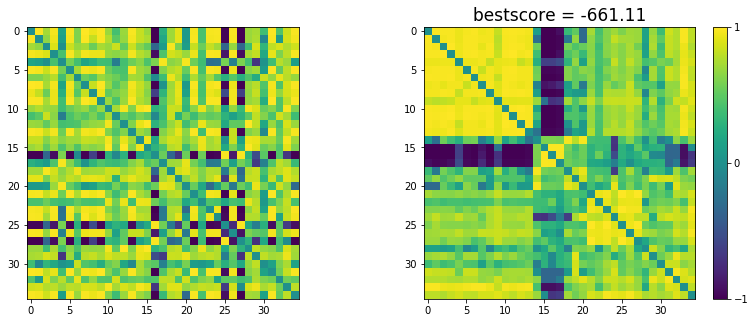

In [37]:
b,bindicies, distances_org = organizemtx(range(len(curves)), distances, 5)

In [38]:
print sorted(bindicies[0:14])
print sorted([0, 1, 5, 7, 9, 13, 21, 23, 26, 31, 34, 24]), '\n'
print sorted(bindicies[30:])

[0, 1, 5, 7, 8, 9, 13, 19, 21, 23, 24, 26, 31, 34]
[0, 1, 5, 7, 9, 13, 21, 23, 24, 26, 31, 34] 

[2, 3, 11, 18, 33]


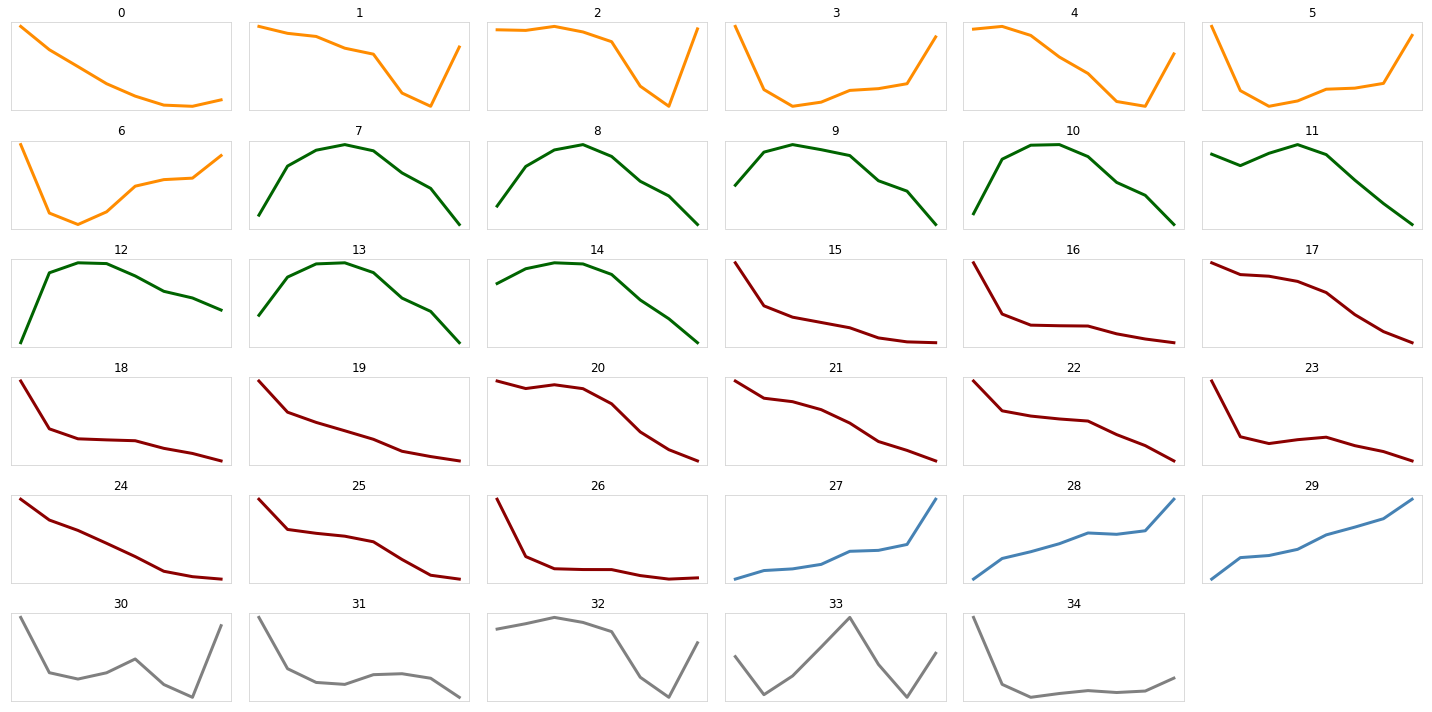

In [146]:
fall        = [('darkred', i) for i in [0, 1, 5, 7, 9, 13, 21, 23, 26, 31, 34, 24]]
riseandfall = [('darkgreen', i) for i in  [10, 12, 14, 15, 19, 22, 28, 33]]
rise        = [('steelblue', i) for i in  [16, 25, 27]]
fallandrise = [('darkorange', i) for i in  [3, 2, 11, 17, 18, 4, 20]]
wtf         = [('grey', i) for i in  [6, 8,   29, 30, 32]]

clusterindicies = fallandrise + riseandfall + fall + rise + wtf



f, ax = plt.subplots(6, 6, figsize=(20, 10))

indicies = [(i,j) for i in range(6) for j in range(6)]

for ijk in range(len(curves)):
    
    color, iijk = clusterindicies[ijk]
    #iijk = ijk
    ax[indicies[ijk]].plot(curves[iijk], color = color, linewidth = 3)
    ax[indicies[ijk]].set_title(str(ijk))
    #ax[indicies[ijk]].set_axis_off()
    ax[indicies[ijk]].spines['bottom'].set_color('lightgrey')
    ax[indicies[ijk]].spines['top'].set_color('lightgrey')
    ax[indicies[ijk]].spines['left'].set_color('lightgrey')
    ax[indicies[ijk]].spines['right'].set_color('lightgrey')


 
ax[5,5].set_axis_off()

for i in range(6):
    for j in range(6):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
plt.tight_layout()


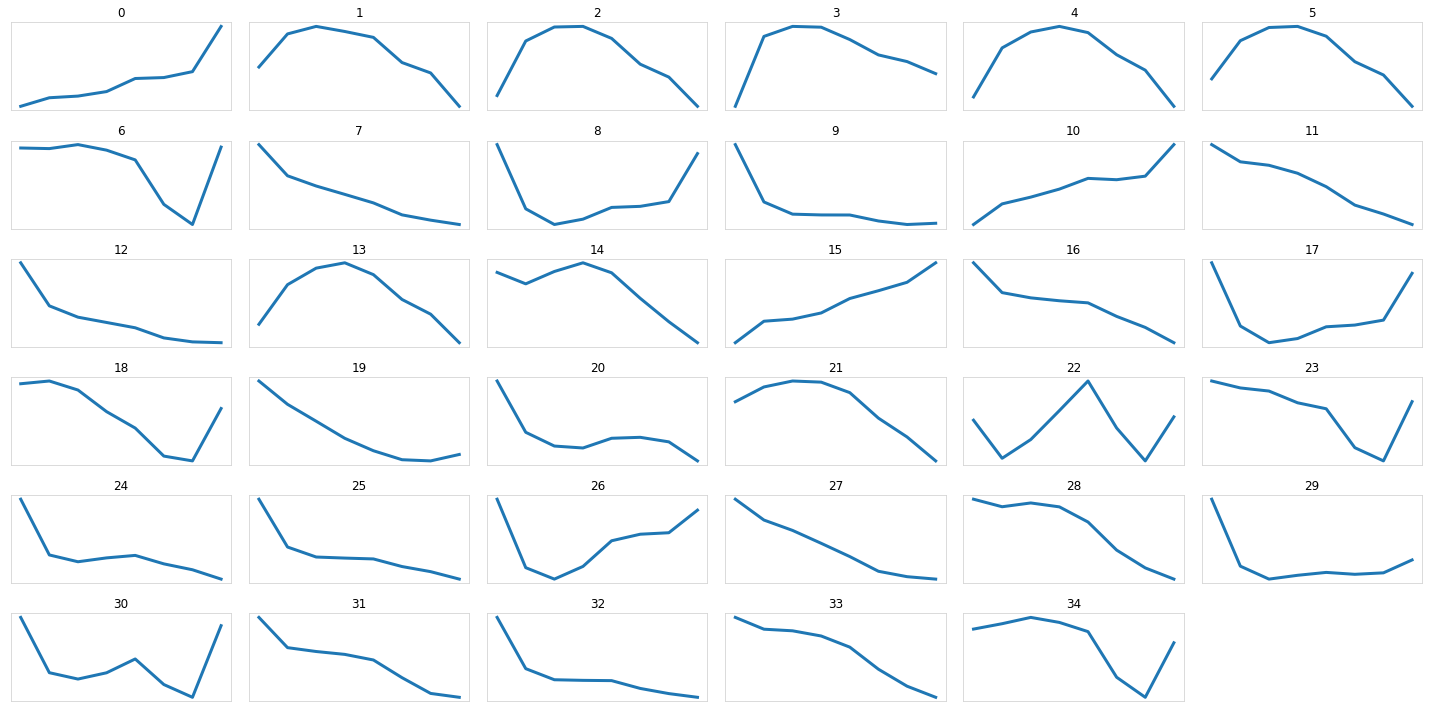

In [349]:
f, ax = plt.subplots(6, 6, figsize=(20, 10))

indicies = [(i,j) for i in range(6) for j in range(6)]

for ijk in range(len(curves)):
    
    iijk = ijk
    ax[indicies[ijk]].plot(curves[iijk],  linewidth = 3)
    ax[indicies[ijk]].set_title(str(ijk))
    #ax[indicies[ijk]].set_axis_off()
    ax[indicies[ijk]].spines['bottom'].set_color('lightgrey')
    ax[indicies[ijk]].spines['top'].set_color('lightgrey')
    ax[indicies[ijk]].spines['left'].set_color('lightgrey')
    ax[indicies[ijk]].spines['right'].set_color('lightgrey')


 
ax[5,5].set_axis_off()

for i in range(6):
    for j in range(6):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
plt.tight_layout()


array([ 0,  2,  4,  5,  8,  9, 12, 20, 21, 22, 28, 29, 30, 31, 34])

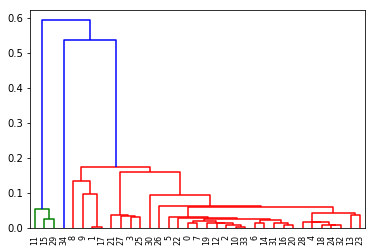

In [99]:
Z = hac.linkage(curves, method='single', metric='correlation')
d = hac.dendrogram( Z,    leaf_rotation=90.,  leaf_font_size=8.,)
a = 2

5 27
6 29
5 29
5 30
4 30
4 31
4 32
4 33
4 34
3 34
2 34
2 35
1 35


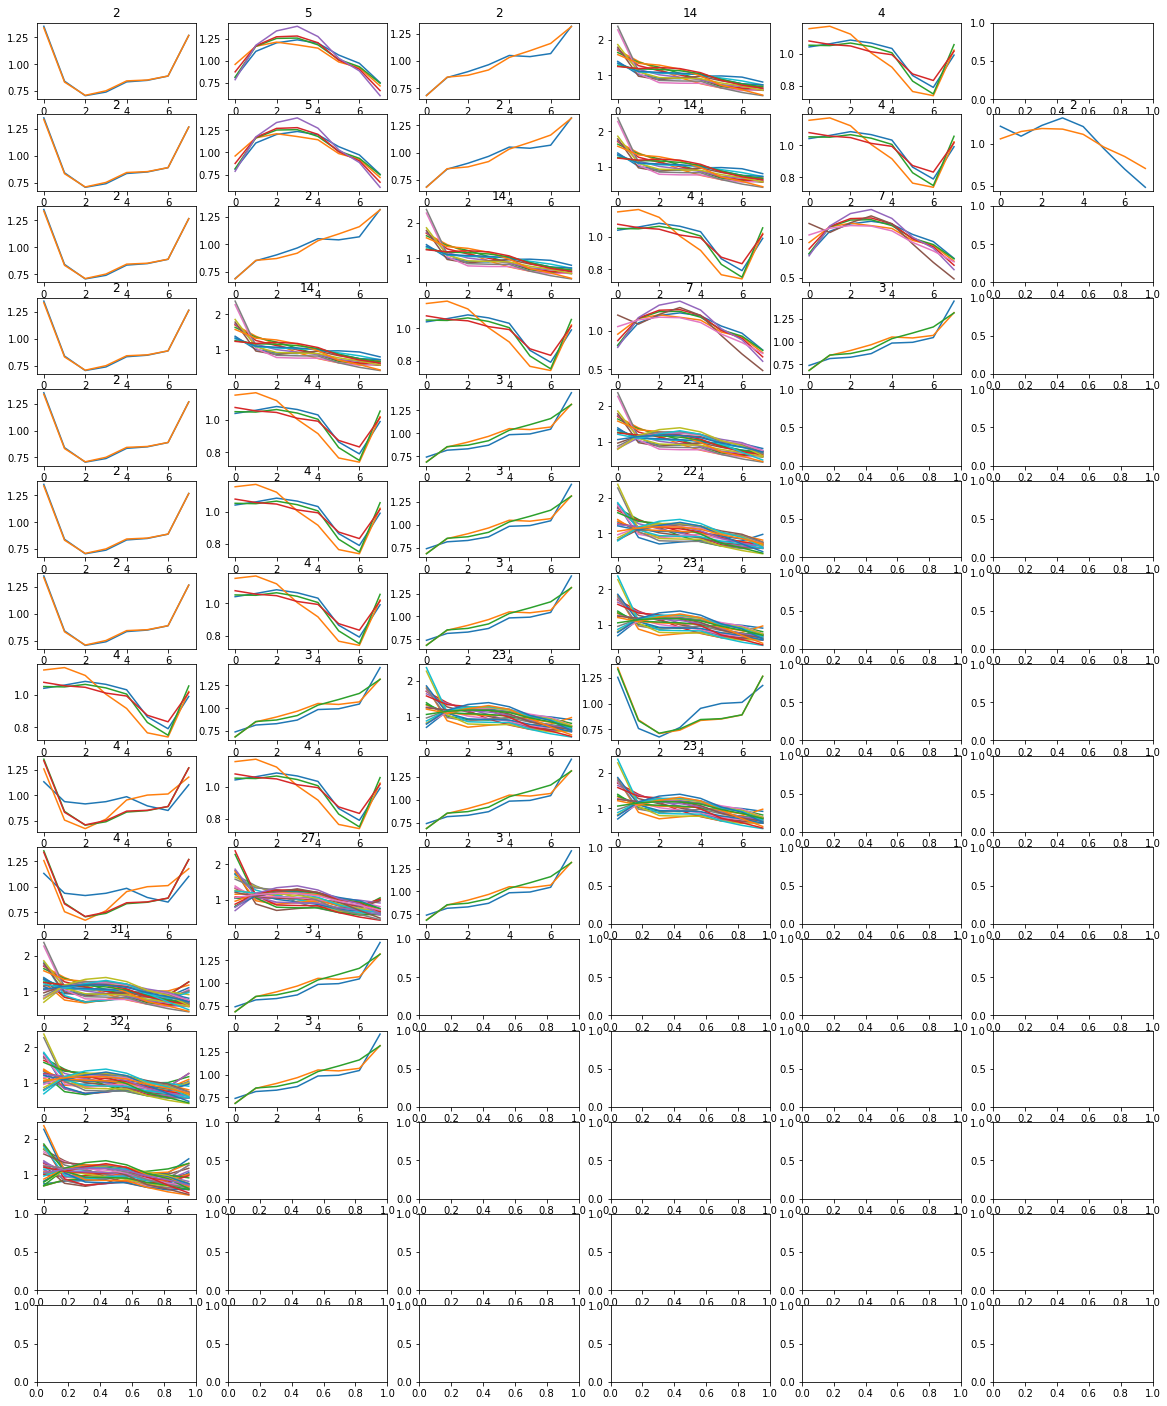

In [143]:
linkage_matrix = Z
n = len(curves)
cluster_dict = dict()


f, ax = plt.subplots(15, 6, figsize=(20, 25))

indind = 0

for i in range(0, 34):
    
    new_cluster_id = n+i
    old_cluster_id_0 = linkage_matrix[i, 0]
    old_cluster_id_1 = linkage_matrix[i, 1]
    combined_ids = list()
    if old_cluster_id_0 in cluster_dict:
        combined_ids += cluster_dict[old_cluster_id_0]
        del cluster_dict[old_cluster_id_0]
    else:
        combined_ids += [old_cluster_id_0]
    if old_cluster_id_1 in cluster_dict:
        combined_ids += cluster_dict[old_cluster_id_1]
        del cluster_dict[old_cluster_id_1]
    else:
        combined_ids += [old_cluster_id_1]
    cluster_dict[new_cluster_id] = combined_ids

    if i > 20: 
        n_c = len(cluster_dict.keys())
        n_n = len([item for sublist in cluster_dict.values() for item in sublist])
        
        for jind, (clus, nodes) in enumerate(cluster_dict.items()):
            for nnodes in nodes:
                ax[indind,jind].plot(curves[int(nnodes)])
            ax[indind,jind].set_title(len(nodes))
        
        indind += 1
        
        print n_c, n_n
        
    

In [ ]:
DO THE SAME THING WITH A FEW RANDOM ALIGNMEGNTS AS WELL!